# Dataset size difference plot

This notebook plots the difference in accuracy between datasets of different sizes.<br>
It plots the loss and accuracy in two plots side by side.

In [2]:
import matplotlib.pyplot as plt

def get_data(data_path):
    with open(data_path, "r") as f:
        train_loss = []
        train_acc = []

        validation_loss = []
        validation_acc = []

        for i, line in enumerate(f.readlines()):
            if i % 2 == 0:
                train_loss.append((len(train_loss), float(line.split(",")[0])))
                train_acc.append((len(train_loss) - 1, float(line.split(",")[1].strip())))
            else:
                validation_loss.append((len(train_loss) - 1, float(line.split(",")[0])))
                validation_acc.append((len(train_loss) - 1, float(line.split(",")[1].strip())))

    return train_loss, train_acc, validation_loss, validation_acc

In [4]:
data_paths = [
            "loss_files\\10000loss.txt",
            "loss_files\\loss100k1.txt",
            "loss_files\\250000lossv1.txt"
            ]

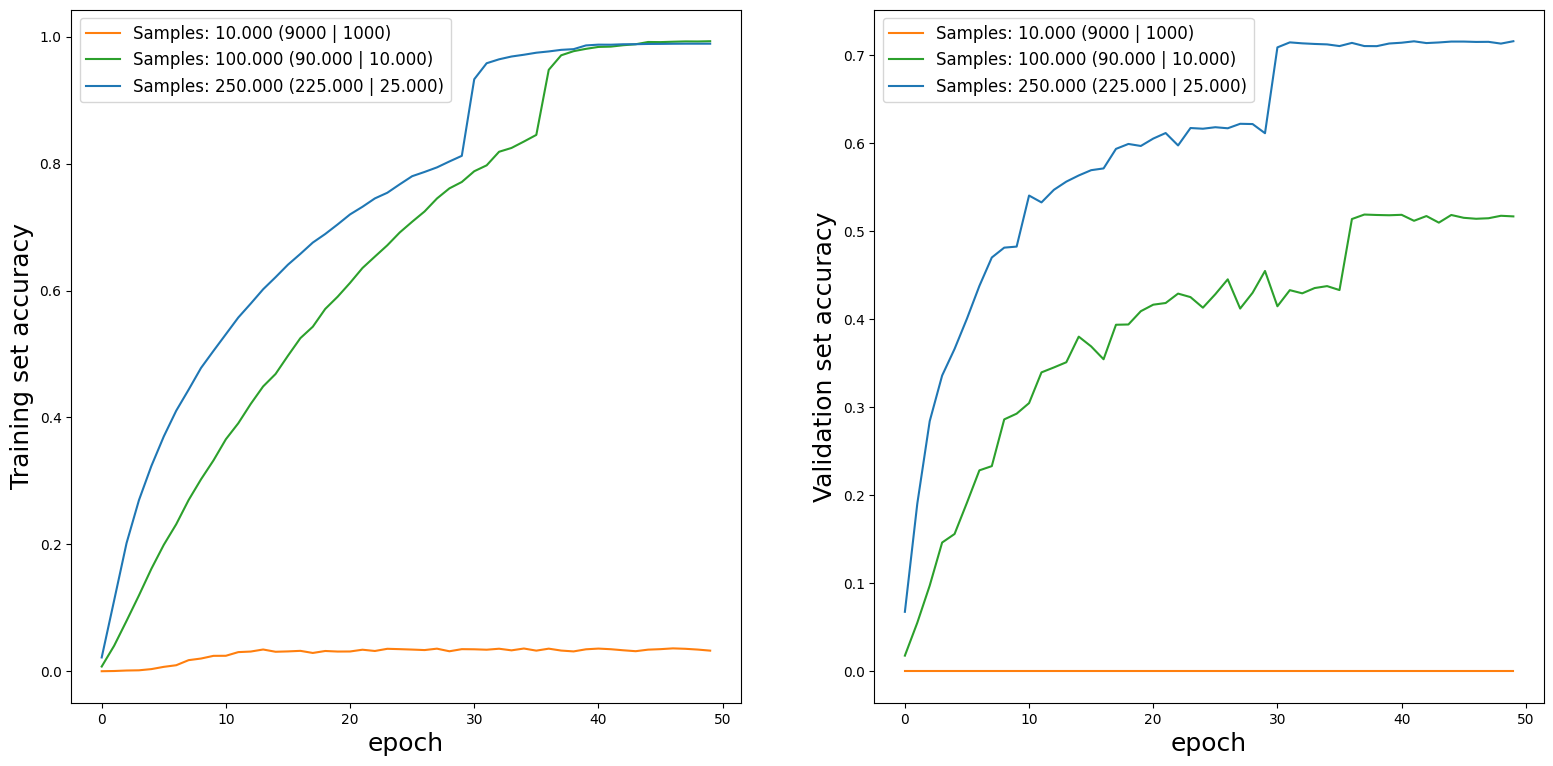

In [40]:
fig, axs = plt.subplots(1, 2,figsize=(19,9))
axs[0].set(xlabel='epoch', ylabel='Training set accuracy')
axs[1].set(xlabel="epoch", ylabel="Validation set accuracy")

labels = ["Samples: 10.000 (9000 | 1000)", "Samples: 100.000 (90.000 | 10.000)", "Samples: 250.000 (225.000 | 25.000)"]
colors = ["tab:orange", "tab:green", "tab:blue"]

for i, data_path in enumerate(data_paths):
    _, train_acc, _, validation_acc = get_data(data_path)

    axs[0].plot(*zip(*train_acc), label=labels[i], color=colors[i])
    axs[1].plot(*zip(*validation_acc), colors[i], label=labels[i])

axs[0].xaxis.label.set_fontsize(18)
axs[0].yaxis.label.set_fontsize(18)

axs[1].xaxis.label.set_fontsize(18)
axs[1].yaxis.label.set_fontsize(18)
axs[0].legend(fontsize="12" )
axs[1].legend(fontsize="12")
plt.show()